# Research Practicum: Dublin Bus Data Preparation & Analysis

##  Separate a single route and a single journey idd in a specific direction

In [2]:
import pandas as pd
import matplotlib
import numpy
import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')
import seaborn as sns
import sklearn
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

%matplotlib inline

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('siri.20121106.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df.shape

C:\Users\pamel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1765912, 15)

In [4]:
df.head(5)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
0,1352160000000000,15,0,00150001,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0
1,1352160000000000,46,0,046A1002,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0
2,1352160000000000,14,0,00140001,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0
3,1352160002000000,41,0,041B0002,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1
4,1352160002000000,63,0,null,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0


## Separating the 46 line for pattern id 046A1001 on the 11-05-2012

In [5]:
df_sample1 = df.loc[(df['Line_ID'] == '46') & (df['JourneyPattern_ID'] == '046A1001') & (df['Time_Frame'] == '2012-11-05')]
df_sample1.head(12)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
36,1352160004000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.242417,53.326218,-413,46018,36019,804,0
171,1352160023000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.240850,53.325100,-413,46018,36019,804,0
394,1352160045000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.239767,53.324249,-413,46018,36019,804,0
520,1352160063000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.237733,53.322716,-413,46018,36019,804,0
660,1352160083000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.235384,53.321732,-413,46018,36019,804,0
840,1352160104000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.233067,53.320068,-413,46018,36019,804,0
983,1352160122000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.232200,53.319435,-413,46018,36019,804,0
1104,1352160142000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.231467,53.319435,-413,46018,36019,804,0
1421,1352160183000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.231467,53.319435,-413,46018,36019,804,0
1532,1352160203000000,46,0,046A1001,2012-11-05,7417,D2,0,-6.230900,53.317616,-413,46018,36019,804,0


In [6]:
df_sample1.shape

(12, 15)

## Line 7, Day 11-05-2012, First Journey of the Day

In [7]:
df_sample2 = df.loc[(df['Line_ID'] == '7') & (df['Time_Frame'] == '2012-11-05') &(df['JourneyPattern_ID'] == '00070001')]
df_sample2.shape

(63, 15)

In [8]:
df_sample2.isnull().sum()

Timestamp            0
Line_ID              0
Direction            0
JourneyPattern_ID    0
Time_Frame           0
VehicleJourney_ID    0
Operator             0
Congestion           0
Longitude            0
Latitude             0
Delay                0
Block_ID             0
Vehicle_ID           0
Stop_ID              0
At_Stop              0
dtype: int64

## Order by JourneyPattern_ID

In [9]:
df_sample2.sort_values(by="JourneyPattern_ID", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(15)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
115,1352160010000000,7,0,00070001,2012-11-05,6966,D1,0,-6.132239,53.251637,-72,7009,43021,3219,0
3478,1352160515000000,7,0,00070001,2012-11-05,6963,D1,0,-6.135753,53.266727,-212,7014,43017,3213,0
3622,1352160537000000,7,0,00070001,2012-11-05,6963,D1,0,-6.134470,53.266483,-212,7014,43017,3213,0
3712,1352160556000000,7,0,00070001,2012-11-05,6963,D1,0,-6.133990,53.265347,-212,7014,43017,3213,0
3802,1352160576000000,7,0,00070001,2012-11-05,6963,D1,0,-6.134746,53.264610,-212,7014,43017,3213,0
3933,1352160598000000,7,0,00070001,2012-11-05,6963,D1,0,-6.137473,53.262249,-242,7014,43017,3214,0
4027,1352160616000000,7,0,00070001,2012-11-05,6963,D1,0,-6.138143,53.259109,-257,7014,43017,3215,0
4118,1352160637000000,7,0,00070001,2012-11-05,6963,D1,0,-6.135895,53.256973,-257,7014,43017,3216,0
4234,1352160657000000,7,0,00070001,2012-11-05,6963,D1,0,-6.134860,53.256100,-257,7014,43017,3217,0
4323,1352160677000000,7,0,00070001,2012-11-05,6963,D1,0,-6.131446,53.254505,-257,7014,43017,3218,0


## Line7, Day 11-05-2012, First Journey of the Day, At Stop = True

In [10]:
stops = df_sample2['Stop_ID'].tolist()
print(stops)

['3219', '2040', '3220', '2040', '3220', '2041', '3220', '2041', '3221', '2041', '3221', '2041', '3221', '2043', '2044', '2045', '3221', '2045', '2046', '2046', '2046', '6082', '6082', '6082', '3205', '3206', '3207', '3208', '3209', '3210', '4981', '3211', '3212', '3213', '3213', '3213', '3213', '3214', '3215', '3216', '3217', '3218', '3218', '3218', '3219', '3219', '3220', '3220', '3221', '3221', '3221', '3221', '3221', '4982', '4982', '4982', '4982', '4982', '4982', '4982', '4982', '4982', '4982']


In [11]:
df_sample3 = df.loc[(df['Line_ID'] == '7') & (df['Time_Frame'] == '2012-11-05') & (df['JourneyPattern_ID'] == '00070001') &
                   (df['At_Stop'] == 1)]
df_sample3.shape

(12, 15)

In [12]:
df_sample3.head(12) 
# we can see here that the At_Stop Feature is not that informative as it only appears alongside 2 unique stops

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
259,1352160031000000,7,0,00070001,2012-11-05,6966,D1,0,-6.133010,53.250805,-72,7009,43021,3220,1
4771,1352160776000000,7,0,00070001,2012-11-05,6963,D1,0,-6.133010,53.250805,-215,7014,43017,3220,1
5453,1352160940000000,7,0,00070001,2012-11-05,6963,D1,0,-6.129517,53.248219,-142,7014,43017,4982,1
5530,1352160956000000,7,0,00070001,2012-11-05,6963,D1,0,-6.133200,53.249832,-142,7014,43017,4982,1
5595,1352160976000000,7,0,00070001,2012-11-05,6963,D1,0,-6.133533,53.250118,-142,7014,43017,4982,1
5663,1352160997000000,7,0,00070001,2012-11-05,6963,D1,0,-6.134017,53.249832,-142,7014,43017,4982,1
5687,1352160999000000,7,0,00070001,2012-11-05,6963,D1,0,-6.134017,53.249832,-82,7014,43017,4982,1
5752,1352161017000000,7,0,00070001,2012-11-05,6963,D1,0,-6.136150,53.247833,-82,7014,43017,4982,1
5813,1352161037000000,7,0,00070001,2012-11-05,6963,D1,0,-6.138733,53.246582,-82,7014,43017,4982,1
5884,1352161057000000,7,0,00070001,2012-11-05,6963,D1,0,-6.138617,53.248085,-22,7014,43017,4982,1


# Group By JourneyPatternID

In [13]:
df.shape
df = df.loc[(df['At_Stop'] == 1)]

In [14]:
groupby_jpid = df.groupby(df['JourneyPattern_ID'])
# Get the number of groups
print(len(groupby_jpid))

442


In [15]:
for name, group in groupby_jpid:
    pass

# Analysis based on a single run (VehicleJourney_ID) of a single route (JourneyPattern_ID) on one day

## 442 Unique Journey Ids - This includes all variations of routes. So really there are 442 routes in total (counting directions as separate routes)

In [16]:
# All runs of that particular journey pattern in this day
journey_example = groupby_jpid.get_group('00010001')
print(journey_example.columns)
print(journey_example.shape)

Index(['Timestamp', 'Line_ID', 'Direction', 'JourneyPattern_ID', 'Time_Frame',
       'VehicleJourney_ID', 'Operator', 'Congestion', 'Longitude', 'Latitude',
       'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop'],
      dtype='object')
(2348, 15)


In [17]:
# Pull just one 'run' of the journey id. 
grouped_byrun = journey_example.groupby(['VehicleJourney_ID'])
print("There are ", len(grouped_byrun), " runs of JourneyPattern Id 00010001 in one day")

There are  50  runs of JourneyPattern Id 00010001 in one day


In [18]:
for name, group in grouped_byrun:
    pass

In [19]:
run_example = grouped_byrun.get_group(5425)
print(run_example.shape)
print(run_example.columns)

(74, 15)
Index(['Timestamp', 'Line_ID', 'Direction', 'JourneyPattern_ID', 'Time_Frame',
       'VehicleJourney_ID', 'Operator', 'Congestion', 'Longitude', 'Latitude',
       'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop'],
      dtype='object')


In [20]:
# At the moment we cannot really read the timestamps in any real way - need to convert them so that
# we can analyse patterns in times.
count = 0
for run in run_example: # Iterates through the columns
    print(run)
    count += 1
    if count > 10:
        break

Timestamp
Line_ID
Direction
JourneyPattern_ID
Time_Frame
VehicleJourney_ID
Operator
Congestion
Longitude
Latitude
Delay


In [21]:
# Add in extra columns to hold day, time and date
day = 'null'
tm = 'null'
run_example['Day'] = day
run_example['Time'] = tm
print(run_example.columns)

Index(['Timestamp', 'Line_ID', 'Direction', 'JourneyPattern_ID', 'Time_Frame',
       'VehicleJourney_ID', 'Operator', 'Congestion', 'Longitude', 'Latitude',
       'Delay', 'Block_ID', 'Vehicle_ID', 'Stop_ID', 'At_Stop', 'Day', 'Time'],
      dtype='object')


C:\Users\pamel\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pamel\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
count = 0

def convert_timestamp(timest):
        timest = (timest/1000)/1000
        date_time = datetime.datetime.fromtimestamp(timest).strftime('%Y-%m-%d %H:%M:%S')
        reading_time = date_time[11:]
        reading_day = datetime.datetime.strptime('January-11-2010', '%B-%d-%Y').strftime('%A')
        return reading_time, reading_day
        
for index, row in run_example.iterrows():
    converted_timestamp = convert_timestamp(row['Timestamp'])
    time_value = converted_timestamp[0]
    day_value = converted_timestamp[1]
    run_example.set_value(index, 'Time', time_value)
    run_example.set_value(index, 'Day', day_value)

In [23]:
print(run_example[['JourneyPattern_ID', 'Time', 'VehicleJourney_ID', 'Stop_ID']].head(10))

       JourneyPattern_ID      Time  VehicleJourney_ID Stop_ID
489027          00010001  10:15:06               5425     226
489700          00010001  10:15:25               5425     226
490278          00010001  10:15:45               5425     226
491020          00010001  10:16:06               5425     226
491619          00010001  10:16:26               5425     226
492115          00010001  10:16:45               5425     226
492872          00010001  10:17:05               5425     226
493456          00010001  10:17:26               5425     226
494387          00010001  10:17:56               5425     226
495114          00010001  10:18:17               5425     226


In [24]:
# cut out all but last time at stop - as an indication of when the bus will leave that stop
run_example = run_example.drop_duplicates(subset='Stop_ID', keep='last')

In [25]:
run_example.shape

(28, 17)

In [26]:
run_example.head(5)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Day,Time
498785,1352197218000000,1,0,00010001,2012-11-06,5425,RD,0,-6.262190,53.391178,14,1001,33494,226,1,Monday,10:20:18
503022,1352197357000000,1,0,00010001,2012-11-06,5425,RD,0,-6.251322,53.391087,11,1001,33494,227,1,Monday,10:22:37
504197,1352197396000000,1,0,00010001,2012-11-06,5425,RD,0,-6.249222,53.389858,11,1001,33494,230,1,Monday,10:23:16
507164,1352197496000000,1,0,00010001,2012-11-06,5425,RD,0,-6.246041,53.389191,54,1001,33494,231,1,Monday,10:24:56
511492,1352197637000000,1,0,00010001,2012-11-06,5425,RD,0,-6.242439,53.386570,57,1001,33494,1641,1,Monday,10:27:17


In [27]:
# drop columns not needed
run_example.drop(run_example.columns[[2, 6, 7, 11, 12]], axis=1, inplace=True)

In [28]:
run_example.head(5)

,Timestamp,Line_ID,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Longitude,Latitude,Delay,Stop_ID,At_Stop,Day,Time
498785,1352197218000000,1,00010001,2012-11-06,5425,-6.262190,53.391178,14,226,1,Monday,10:20:18
503022,1352197357000000,1,00010001,2012-11-06,5425,-6.251322,53.391087,11,227,1,Monday,10:22:37
504197,1352197396000000,1,00010001,2012-11-06,5425,-6.249222,53.389858,11,230,1,Monday,10:23:16
507164,1352197496000000,1,00010001,2012-11-06,5425,-6.246041,53.389191,54,231,1,Monday,10:24:56
511492,1352197637000000,1,00010001,2012-11-06,5425,-6.242439,53.386570,57,1641,1,Monday,10:27:17


In [29]:
"""
lm_predictions = lm.predict(df[feature_cols])
predicted_class = list()
for i in lm_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'PredictedClass': predicted_class})
"""

"\nlm_predictions = lm.predict(df[feature_cols])\npredicted_class = list()\nfor i in lm_predictions:\n    if i >= 0.5:\n        predicted_class.append(1)\n    else:\n        predicted_class.append(0)\n        \ndf_true_vs_lm_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'PredictedClass': predicted_class})\n"

# Analysis of the same above except over the course of a week
## Need a better picture of the stops - must be more than 28 on the route

In [30]:
df_day1 = pd.read_csv('siri.20121106.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day2 = pd.read_csv('siri.20121107.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day3 = pd.read_csv('siri.20121108.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day4 = pd.read_csv('siri.20121109.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day5 = pd.read_csv('siri.20121110.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day6 = pd.read_csv('siri.20121111.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])
df_day7 = pd.read_csv('siri.20121112.csv', names=["Timestamp", "Line_ID", "Direction", "JourneyPattern_ID", "Time_Frame", "VehicleJourney_ID", "Operator", "Congestion", "Longitude", "Latitude", "Delay", "Block_ID", "Vehicle_ID", "Stop_ID", "At_Stop"])

C:\Users\pamel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pamel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_day1 = df_day1.loc[(df_day1['At_Stop'] == 1) & (df_day1['JourneyPattern_ID'] == '00010001')]
df_day2 = df_day2.loc[(df_day2['At_Stop'] == 1) & (df_day2['JourneyPattern_ID'] == '00010001')]
df_day3 = df_day3.loc[(df_day3['At_Stop'] == 1) & (df_day3['JourneyPattern_ID'] == '00010001')]
df_day4 = df_day4.loc[(df_day4['At_Stop'] == 1) & (df_day4['JourneyPattern_ID'] == '00010001')]
df_day5 = df_day5.loc[(df_day5['At_Stop'] == 1) & (df_day5['JourneyPattern_ID'] == '00010001')]
df_day6 = df_day6.loc[(df_day6['At_Stop'] == 1) & (df_day6['JourneyPattern_ID'] == '00010001')]
df_day7 = df_day7.loc[(df_day7['At_Stop'] == 1) & (df_day7['JourneyPattern_ID'] == '00010001')]

In [32]:
frames = [df_day1, df_day2, df_day3, df_day4, df_day5, df_day6, df_day7]

In [33]:
df_week = pd.concat(frames)

In [34]:
df_week_groups = df_week.groupby(['VehicleJourney_ID'])

In [35]:
len(df_week_groups)


117

In [36]:
run_group = df_week_groups.get_group(5425)

In [37]:
print(run_group.shape)

(330, 15)


In [38]:
day = 'null'
tm = 'null'
run_group['Day'] = day
run_group['Time'] = tm

# for the broader dataframe
df_week['Day'] = day
df_week['Time'] = tm

C:\Users\pamel\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\pamel\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
def convert_timestamp(timest):
    # us for correct format
        timest = (timest/1000)/1000
        date_time = datetime.datetime.fromtimestamp(timest).strftime('%Y-%m-%d %H:%M:%S')
        reading_time = date_time[11:]
        date = date_time[:10]
        reading_day = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A')
        return reading_time, reading_day

for index, row in run_group.iterrows():
    converted_timestamp = convert_timestamp(row['Timestamp'])
    time_value = converted_timestamp[0]
    day_value = converted_timestamp[1]
    run_group.set_value(index, 'Time', time_value)
    run_group.set_value(index, 'Day', day_value)
    
for index, row in df_week.iterrows():
    converted_tm = convert_timestamp(row['Timestamp'])
    time_value = converted_tm[0]
    day_value = converted_tm[1]
    df_week.set_value(index, 'Time', time_value)
    df_week.set_value(index, 'Day', day_value)


In [40]:
run_group = run_group.sort_values(by='Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df_week = df_week.sort_values(by='Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [41]:
df_week.head(5)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Day,Time
104901,1352534546000000,1,0,00010001,2012-11-10,12121,RD,0,-6.251322,53.391087,-3,1001,33477,227,1,Saturday,08:02:26
105220,1352534566000000,1,0,00010001,2012-11-10,12121,RD,0,-6.251322,53.391087,16,1001,33477,227,1,Saturday,08:02:46
107572,1352534687000000,1,0,00010001,2012-11-10,12121,RD,0,-6.246041,53.389191,44,1001,33477,231,1,Saturday,08:04:47
110266,1352534827000000,1,0,00010001,2012-11-10,12121,RD,0,-6.245068,53.381519,-115,1001,33477,213,1,Saturday,08:07:07
111348,1352534886000000,1,0,00010001,2012-11-10,12121,RD,0,-6.246649,53.379311,-115,1001,33477,214,1,Saturday,08:08:06


In [42]:
run_group.head(5)

,Timestamp,Line_ID,Direction,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Operator,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Day,Time
488385,1352283285000000,1,0,00010001,2012-11-07,5425,RD,0,-6.261983,53.391201,-196,1001,33494,226,1,Wednesday,10:14:45
489027,1352196906000000,1,0,00010001,2012-11-06,5425,RD,0,-6.261950,53.391151,-176,1001,33494,226,1,Tuesday,10:15:06
489106,1352283306000000,1,0,00010001,2012-11-07,5425,RD,0,-6.261983,53.391201,-176,1001,33494,226,1,Wednesday,10:15:06
485272,1352369710000000,1,0,00010001,2012-11-08,5425,RD,0,-6.262050,53.391167,-174,1001,33492,226,1,Thursday,10:15:10
489700,1352196925000000,1,0,00010001,2012-11-06,5425,RD,0,-6.261950,53.391151,-156,1001,33494,226,1,Tuesday,10:15:25


In [43]:
run_group.drop(run_group.columns[[2, 6, 7, 11]], axis=1, inplace=True)
df_week.drop(df_week.columns[[2, 6]], axis=1, inplace=True)

In [44]:
run_group.head(74)

,Timestamp,Line_ID,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Longitude,Latitude,Delay,Vehicle_ID,Stop_ID,At_Stop,Day,Time
488385,1352283285000000,1,00010001,2012-11-07,5425,-6.261983,53.391201,-196,33494,226,1,Wednesday,10:14:45
489027,1352196906000000,1,00010001,2012-11-06,5425,-6.261950,53.391151,-176,33494,226,1,Tuesday,10:15:06
489106,1352283306000000,1,00010001,2012-11-07,5425,-6.261983,53.391201,-176,33494,226,1,Wednesday,10:15:06
485272,1352369710000000,1,00010001,2012-11-08,5425,-6.262050,53.391167,-174,33492,226,1,Thursday,10:15:10
489700,1352196925000000,1,00010001,2012-11-06,5425,-6.261950,53.391151,-156,33494,226,1,Tuesday,10:15:25
489727,1352283326000000,1,00010001,2012-11-07,5425,-6.261983,53.391201,-156,33494,226,1,Wednesday,10:15:26
485706,1352369728000000,1,00010001,2012-11-08,5425,-6.262050,53.391167,-154,33492,226,1,Thursday,10:15:28
483816,1352715343000000,1,00010001,2012-11-12,5425,-6.262033,53.391151,-139,33494,226,1,Monday,10:15:43
490212,1352283344000000,1,00010001,2012-11-07,5425,-6.261983,53.391201,-136,33494,226,1,Wednesday,10:15:44
490278,1352196945000000,1,00010001,2012-11-06,5425,-6.261950,53.391151,-136,33494,226,1,Tuesday,10:15:45


In [45]:
df_week.head(5)

,Timestamp,Line_ID,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Day,Time
104901,1352534546000000,1,00010001,2012-11-10,12121,0,-6.251322,53.391087,-3,1001,33477,227,1,Saturday,08:02:26
105220,1352534566000000,1,00010001,2012-11-10,12121,0,-6.251322,53.391087,16,1001,33477,227,1,Saturday,08:02:46
107572,1352534687000000,1,00010001,2012-11-10,12121,0,-6.246041,53.389191,44,1001,33477,231,1,Saturday,08:04:47
110266,1352534827000000,1,00010001,2012-11-10,12121,0,-6.245068,53.381519,-115,1001,33477,213,1,Saturday,08:07:07
111348,1352534886000000,1,00010001,2012-11-10,12121,0,-6.246649,53.379311,-115,1001,33477,214,1,Saturday,08:08:06


In [46]:
# null represents idling in the depot so these rows could be left included
# run_group = run_group.drop_duplicates(subset=['Stop_ID', 'Time_Frame'], keep='last')
# order by gps... ??? 

In [47]:
stops = run_group['Stop_ID'].unique().tolist()
print(stops)
print(len(stops))

['226', '228', '229', '227', '230', '231', '1642', '1641', '213', '44', '119', '214', '45', '4432', '46', '47', '48', '49', '51', '52', '50', '265', '271', '340', '350', '351', '352', '353', '354', '355', '356', '357', '390', '374', '372', '377', '375', '380', '378']
39


In [48]:
run_group = run_group.sort_values(by=['Time_Frame', 'Time'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
run_group.shape

(330, 13)

In [49]:
run_group.head(10)

,Timestamp,Line_ID,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Longitude,Latitude,Delay,Vehicle_ID,Stop_ID,At_Stop,Day,Time
489027,1352196906000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-176,33494,226,1,Tuesday,10:15:06
489700,1352196925000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-156,33494,226,1,Tuesday,10:15:25
490278,1352196945000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-136,33494,226,1,Tuesday,10:15:45
491020,1352196966000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-116,33494,226,1,Tuesday,10:16:06
491619,1352196986000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-96,33494,226,1,Tuesday,10:16:26
492115,1352197005000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-76,33494,226,1,Tuesday,10:16:45
492872,1352197025000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-56,33494,226,1,Tuesday,10:17:05
493456,1352197046000000,1,00010001,2012-11-06,5425,-6.26195,53.391151,-36,33494,226,1,Tuesday,10:17:26
494387,1352197076000000,1,00010001,2012-11-06,5425,-6.26219,53.391178,-36,33494,226,1,Tuesday,10:17:56
495114,1352197097000000,1,00010001,2012-11-06,5425,-6.26219,53.391178,0,33494,226,1,Tuesday,10:18:17


# Data Understanding: Exploring Relationships Between Feature Pairs

## Print the Correlations between the Categorical Features

In [50]:
df_week.shape

(14604, 15)

In [51]:
df_week.head(10)

,Timestamp,Line_ID,JourneyPattern_ID,Time_Frame,VehicleJourney_ID,Congestion,Longitude,Latitude,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Day,Time
104901,1352534546000000,1,00010001,2012-11-10,12121,0,-6.251322,53.391087,-3,1001,33477,227,1,Saturday,08:02:26
105220,1352534566000000,1,00010001,2012-11-10,12121,0,-6.251322,53.391087,16,1001,33477,227,1,Saturday,08:02:46
107572,1352534687000000,1,00010001,2012-11-10,12121,0,-6.246041,53.389191,44,1001,33477,231,1,Saturday,08:04:47
110266,1352534827000000,1,00010001,2012-11-10,12121,0,-6.245068,53.381519,-115,1001,33477,213,1,Saturday,08:07:07
111348,1352534886000000,1,00010001,2012-11-10,12121,0,-6.246649,53.379311,-115,1001,33477,214,1,Saturday,08:08:06
113247,1352534986000000,1,00010001,2012-11-10,12121,0,-6.252235,53.373093,-185,1001,33477,44,1,Saturday,08:09:46
115121,1352535086000000,1,00010001,2012-11-10,12121,0,-6.257374,53.363998,-335,1001,33477,47,1,Saturday,08:11:26
117768,1352535227000000,1,00010001,2012-11-10,12121,0,-6.264605,53.356716,-555,1001,33477,52,1,Saturday,08:13:47
120446,1352535370000000,1,00010001,2012-11-10,12121,0,-6.262030,53.353359,-602,1001,33477,265,1,Saturday,08:16:10
122144,1352535465000000,1,00010001,2012-11-10,12121,0,-6.259525,53.348591,-710,1001,33477,271,1,Saturday,08:17:45


In [52]:
to_change = ['JourneyPattern_ID', 'VehicleJourney_ID', 'Stop_ID', 'Day', 'Congestion']

for item in to_change:
    df_week[item] = df_week[item].astype('category')

In [53]:
print(df_week.dtypes)

Timestamp               int64
Line_ID                object
JourneyPattern_ID    category
Time_Frame             object
VehicleJourney_ID    category
Congestion           category
Longitude             float64
Latitude              float64
Delay                   int64
Block_ID                int64
Vehicle_ID              int64
Stop_ID              category
At_Stop                 int64
Day                  category
Time                   object
dtype: object


In [54]:
categorical_features = ['JourneyPattern_ID', 'VehicleJourney_ID', 'Congestion', 'Stop_ID', 'Day']
continuous_features = ['Timestamp', 'Delay']

In [55]:
# categoical features
df_week[categorical_features].describe().T

,count,unique,top,freq
JourneyPattern_ID,14604,1,00010001,14604
VehicleJourney_ID,14604,117,5437,409
Congestion,14604,1,0,14604
Stop_ID,14604,62,380,3746
Day,14604,7,Monday,2461


In [56]:
# continuous features
df_week[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,14604.0,1.352461e+15,1.774534e+11,1.352192e+15,1.352303e+15,1.352459e+15,1.352588e+15,1.352764e+15
Delay,14604.0,-1.159423e+02,2.975609e+02,-1.824000e+03,-2.810000e+02,-8.900000e+01,0.000000e+00,1.622000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD0DF01E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BD006A8B70>]], dtype=object)

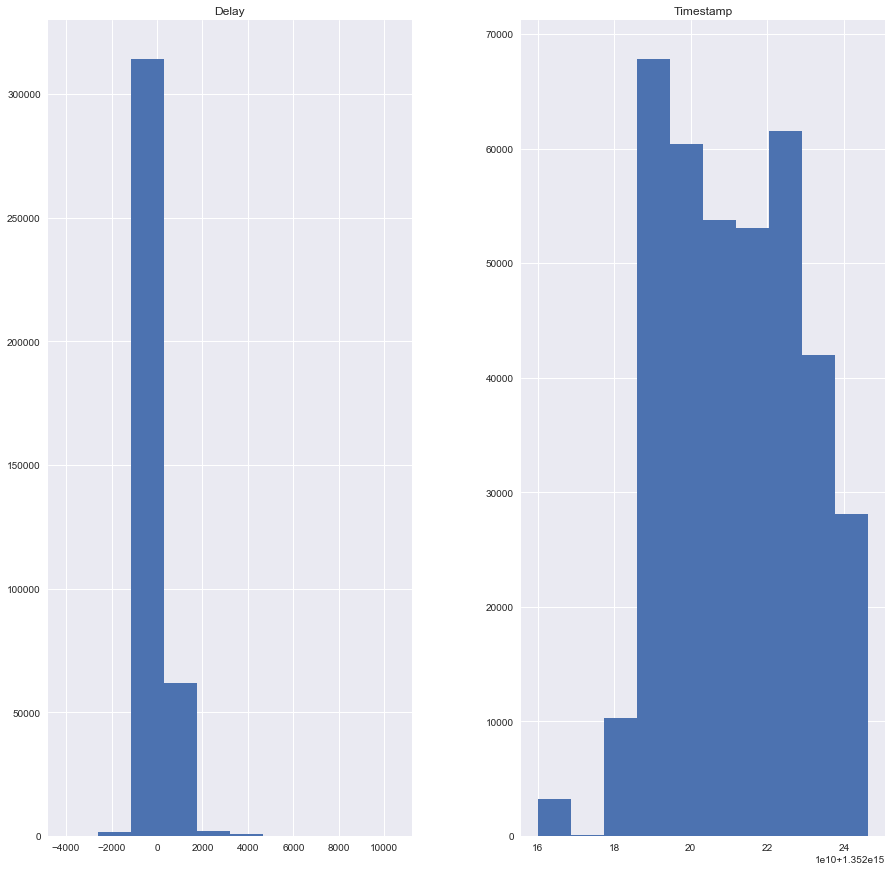

In [57]:
# histograms for continuous features

continuous_columns = df_week[continuous_features].columns

df[continuous_columns].hist(figsize=(15, 15))

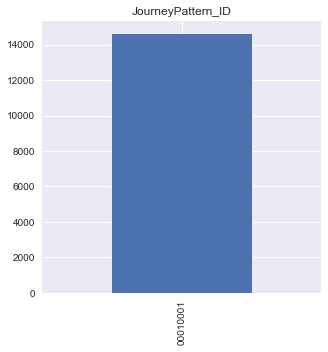

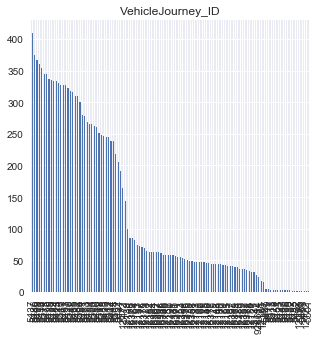

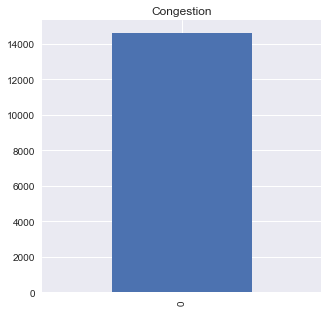

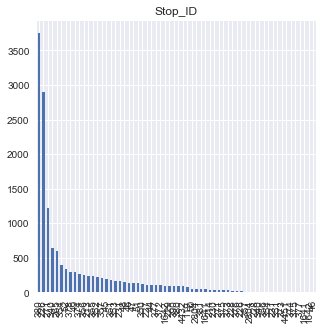

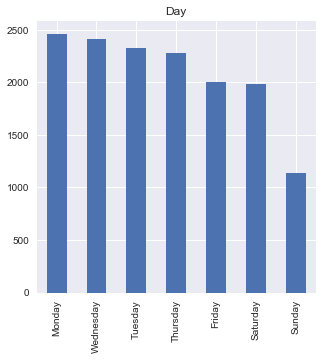

In [58]:
# bar plots for categorical features
categorical_columns = df_week[categorical_features].columns

for column in categorical_columns:
    f = df_week[column].value_counts().plot(kind='bar', title=column, figsize=(5, 5))
    plt.show()

C:\Users\pamel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\Users\pamel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


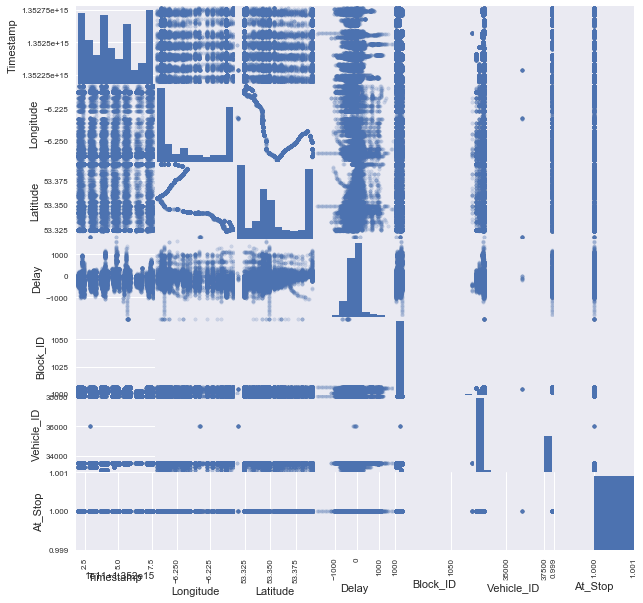

In [59]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_week, alpha=0.2, figsize=(10, 10))
plt.show()